In [9]:
# Loading a model stored in a file
from joblib import load

svm_class = load('modelo_mnist_svm.joblib')
print(svm_class)

SVC(C=5, gamma=0.05)


Se creo el set nuevo de 50 elementos, 5 por cada digito para ello se creo un programa: https://editor.p5js.org/RogerMZ/sketches/RhdAkvJDG

In [10]:
import numpy as np
from PIL import Image

#np.set_printoptions(threshold=np.inf)

def load_images_to_data(image_label, image_directory):
    features_data = []
    label_data = []
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".jpg" in image_file_name:
            img = Image.open(image_file_name).convert("L")
            img = img.resize((28,28))
            data = np.asarray(img)
            dataArray = np.concatenate(data)
            features_data.append(dataArray)
            label_data = np.append(label_data, [image_label], axis=0)
    return features_data, label_data

In [13]:
# Read images to set test array (X, Y)
import os
PATH = 'Digitos/'

X_test = []
y_test = []

for x in sorted(os.listdir(PATH)):
    if not x.startswith('.'):
        print(PATH+x)
        conv = load_images_to_data(x, PATH+x)
        X_test.extend(conv[0])
        y_test = np.append(y_test, conv[1], axis=0)
        
y_test = y_test.astype('int8') # Cast de string a float

Digitos/0
Digitos/1
Digitos/2
Digitos/3
Digitos/4
Digitos/5
Digitos/6
Digitos/7
Digitos/8
Digitos/9


DataSet count: 50


/Users/rogermz/miniconda3/envs/guruday/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


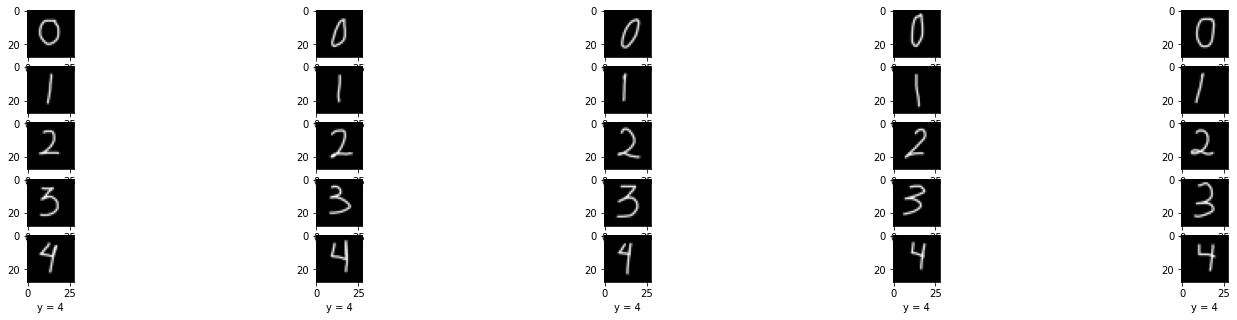

In [14]:
import matplotlib.pyplot as plt

print("DataSet count:", len(X_test))
nMuestras = 25
plt.figure(figsize=(nMuestras, 5))
for i in range(nMuestras):
    im = X_test[i].reshape(28,28)
    l1_plot = plt.subplot(nMuestras/5, 5, i + 1)
    l1_plot.imshow(im, cmap='gray', vmin=0, vmax=255)
    l1_plot.set_xlabel('y = %i' % int(y_test[i]))

In [5]:
randoms = np.random.choice(len(X_test), 10, replace=False)
print("Índices de datos de prueba:", randoms)

X_test_prepared = np.array(X_test)/255.0

x_samples = X_test_prepared[randoms]
y_hat = svm_class.predict(x_samples).astype('int8')
y = np.array(y_test)

for i, index in enumerate(randoms):
    print("Valor: ", y[index])
    print("Predicción: %.3f"% y_hat[i])
    print()

Índices de datos de prueba: [35 46 14 36 28 24 25 48  7  9]
Valor:  7
Predicción: 5.000

Valor:  9
Predicción: 9.000

Valor:  2
Predicción: 2.000

Valor:  7
Predicción: 2.000

Valor:  5
Predicción: 5.000

Valor:  4
Predicción: 7.000

Valor:  5
Predicción: 5.000

Valor:  9
Predicción: 1.000

Valor:  1
Predicción: 5.000

Valor:  1
Predicción: 5.000




Confusion matrix:
[[3 0 0 0 0 0 1 0 0 1]
 [0 3 0 0 0 2 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 3 0 2 0 0 0 0]
 [0 1 0 0 2 0 0 2 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 1 0 0 0 4 0 0 0]
 [0 0 2 1 0 1 0 1 0 0]
 [0 0 0 0 0 2 1 0 2 0]
 [0 1 0 0 0 2 0 0 0 2]]


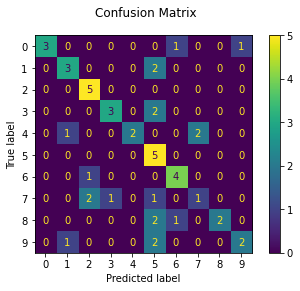

In [6]:
from sklearn import metrics
import matplotlib.pyplot as plt

X_test = np.array(X_test)/255.0

#plot_confusion_matrix
print()
disp = metrics.plot_confusion_matrix(svm_class, X_test, y.astype('str'))
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()